In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from datetime import datetime
import time

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
from math import sqrt

In [5]:
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error)
from sklearn.model_selection import (cross_val_score, cross_val_predict, train_test_split, 
                                     KFold, StratifiedKFold, GridSearchCV)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, fbeta_score, roc_auc_score, roc_curve, make_scorer
from sklearn.metrics import confusion_matrix

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
import xgboost as xgb

In [34]:
selection = 25
year = '2019'
airline = 'DL'
download_path = r'/home/desbrium/Metis/PredictingFlightDelays/Data/BTS Departure Data'
file_path = os.path.join(download_path, f'{selection}airports{airline}{year}.csv')

In [37]:
delta_df = pd.read_csv(file_path)

In [107]:
delta_df['Scheduled Departure Time'] = delta_df['Scheduled Departure Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())

In [108]:
delta_df['Scheduled Arrival Time'] = delta_df['Scheduled Arrival Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())

In [38]:
delta_df['Total Number of Scheduled Flights'] = delta_df['Total Number of Scheduled Flights'].fillna(0)

In [39]:
X = delta_df[['Origin Region', 'Origin Airport', 'Month',
       'Avg Min Delayed Due To Weather Yesterday Region', 'Dest Region',
       'Total Number of Scheduled Flights', 'Schedule Departure Time Name',
       'Distance Range Name','Scheduled Elapsed Time', 
       'Avg Min Delayed Due To Weather Yesterday Region']]

In [40]:
X = pd.get_dummies(X,columns=['Origin Region', 'Dest Region', 'Origin Airport', 'Month', 'Schedule Departure Time Name', 'Distance Range Name'],drop_first=True)

In [41]:
y = delta_df['Delayed Departure']

In [42]:
delayed = y.sum()
perc_delayed = round(y.sum()/y.count(),2)
print(f'Number of delayed Delta flights in 2019: {delayed}, {int(perc_delayed*100)}% were delayed')

not_delayed = y.count() - delayed 
perc_not_delayed = 1 - perc_delayed
print(f'Number of not delayed Delta flights in 2019: {not_delayed}, {int(perc_not_delayed*100)}% were not delayed')

Number of delayed Delta flights in 2019: 105882, 15% were delayed
Number of not delayed Delta flights in 2019: 598619, 85% were not delayed


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify = y_train)

# Logistic Regression

In [21]:
lr = LogisticRegression(C=1000)

In [44]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"Precision Scores: {cross_val_score(lr, X_train2, y_train2, cv=skfold, scoring = 'precision')}")

/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Precision Scores: [0.50574713 0.43459916 0.42028986 0.41290323 0.4494382 ]


/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print(f"Recall Scores: {cross_val_score(lr, X_train2, y_train2, cv=skfold, scoring = 'recall')}")

/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Recall Scores: [0.00974026 0.00759979 0.00855899 0.0094444  0.00885413]


/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print(f"F1 Scores: {cross_val_score(lr, X_train2, y_train2, cv=skfold, scoring = make_scorer(fbeta_score, beta = .8))}")

F1 Scores: [0.035839   0.0305077  0.03272118 0.03002109 0.0332023 ]


In [115]:
lr = LogisticRegression(C=1)

In [116]:
print(f"Recall Scores: {cross_val_score(lr, X_train2, y_train2, cv=skfold, scoring = 'recall')}")

/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Recall Scores: [0.01734061 0.01047739 0.01106766 0.01099388 0.01578986]


/home/desbrium/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [46]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10)

In [23]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"Precision Scores: {cross_val_score(rf, X_train2, y_train2, cv=skfold, scoring = 'precision')}")

Precision Scores: [0.58498896 0.55661882 0.59533898 0.59610706 0.60869565]


In [24]:
print(f"Recall Scores: {cross_val_score(rf, X_train2, y_train2, cv=skfold, scoring = 'recall')}")

Recall Scores: [0.01800472 0.02597211 0.02279938 0.01933151 0.0170442 ]


In [ ]:
print(f"F1 Scores: {cross_val_score(rf, X_train2, y_train2, cv=skfold, scoring = make_scorer(fbeta_score, beta = .8))}")

In [47]:
rf.fit(X,y)

RandomForestClassifier(max_depth=10)

In [50]:
rf.feature_importances_[:7]

array([0.14072248, 0.01728479, 0.03926274, 0.15847717, 0.02850766,
       0.01085121, 0.01017697])

In [59]:
rf_features_dict = {'Features': X.columns, 'Importance': rf.feature_importances_}
rf_features = pd.DataFrame(rf_features_dict)
rf_features = rf_features.sort_values('Importance', ascending = False)
rf_features.head(7)

,Features,Importance
3,Avg Min Delayed Due To Weather Yesterday Region,0.158477
0,Avg Min Delayed Due To Weather Yesterday Region,0.140722
44,Schedule Departure Time Name_Early Morning,0.106136
45,Schedule Departure Time Name_Evening,0.101216
47,Schedule Departure Time Name_Morning,0.096050
48,Schedule Departure Time Name_Night,0.051835
2,Scheduled Elapsed Time,0.039263


<BarContainer object of 7 artists>

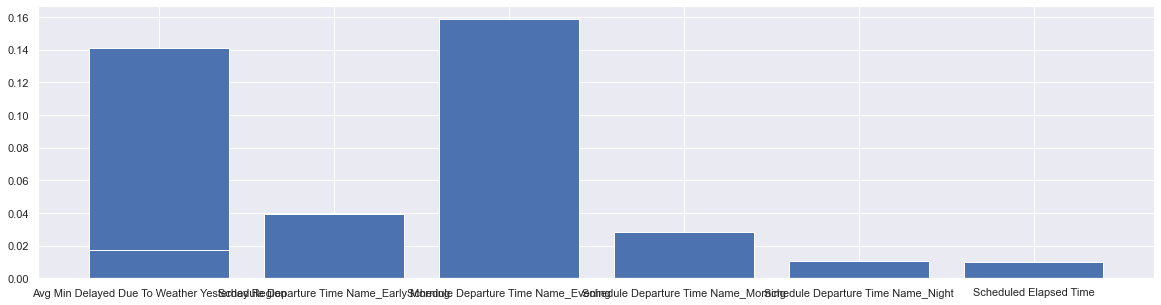

In [62]:
plt.figure(figsize=[20,5])

plt.bar(rf_features.head(7)['Features'], rf.feature_importances_[:7])

# XGBoost

In [44]:
gbm = xgb.XGBClassifier(
                        n_estimators=100,
                        max_depth = 3,
                        learning_rate=.1, #lowering learning_rate,
                        early_stopping_rounds=20
                        )

In [45]:
print(f"Precision Scores: {cross_val_score(gbm, X_train2, y_train2, cv=skfold, scoring = 'precision')}")

/home/desbrium/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:13:58] WARNING: ../src/learner.cc:573: 
Parameters: { "early_stopping_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:13:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:01] WARNING: ../src/learner.cc:573: 
Parameters: { "early_stopping_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:14:01] WARNING: ../src/learner.cc:1095: Starting in XGBoos

In [117]:
print(f"Recall Scores: {cross_val_score(rf, X_train2, y_train2, cv=skfold, scoring = 'recall')}")

Recall Scores: [0.0050915  0.00782115 0.00634546 0.00442706 0.00553383]
